<a href="https://colab.research.google.com/github/Dnasam/CC-OCR-DATA_SCIENCE/blob/main/TASK1_STOCK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a basic machine learning model developed for stock prediction analysis.**

We have used **Netflix** stock data for this analysis.
It is a basic model for analysing present trends and predicting future opening prices based upon previous pattern.

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/drive')


Mounted at /drive


In [ ]:
'''df = pd.read_csv(T
    Path("sp500_stocks.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
df.head()'''
df_ = pd.read_csv('/drive/My Drive/NFLX.csv')
df_.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2/12/2018,252.139999,259.149994,249.000000,257.950012,257.950012,8534900


In [ ]:
df_.shape

(1009, 7)

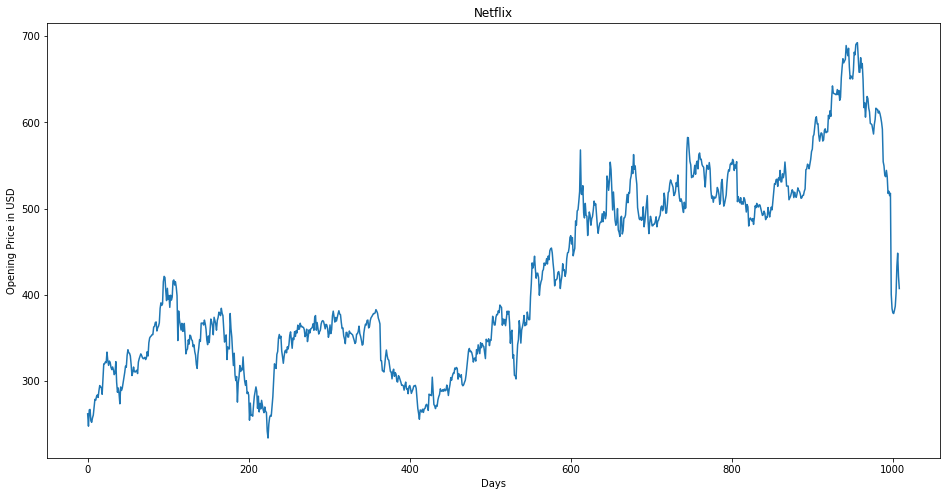

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel("Opening Price in USD")
plt.title('Netflix')
plt.plot(df_['Open'])
plt.show()

In [ ]:
df_ = df_[['Open']]
df_.head(4)

,Open
0,262.000000
1,247.699997
2,266.579987
3,267.079987


In [ ]:
#future_days = 25
future_days = 25
df_['Prediction'] = df_[['Open']].shift(-future_days)
df_.head(4)


,Open,Prediction
0,262.000000,323.869995
1,247.699997,318.160004
2,266.579987,323.170013
3,267.079987,321.420013


In [ ]:
X = np.array(df_.drop(['Prediction'],1))[:-future_days]
print(X)

[[262.      ]
 [247.699997]
 [266.579987]
 [267.079987]
 [253.850006]
 [252.139999]
 [257.290009]
 [260.470001]
 [270.029999]
 [278.730011]
 [277.73999 ]
 [282.070007]
 [283.880005]
 [281.      ]
 [288.75    ]
 [294.769989]
 [293.100006]
 [292.75    ]
 [284.649994]
 [302.850006]
 [319.880005]
 [320.      ]
 [322.200012]
 [321.329987]
 [333.559998]
 [323.869995]
 [318.160004]
 [323.170013]
 [321.420013]
 [315.799988]
 [313.26001 ]
 [316.350006]
 [313.070007]
 [307.410004]
 [309.359985]
 [322.48999 ]
 [298.390015]
 [287.      ]
 [291.940002]
 [285.450012]
 [273.630005]
 [293.149994]
 [289.100006]
 [291.769989]
 [297.679993]
 [302.880005]
 [309.720001]
 [317.290009]
 [315.98999 ]
 [329.660004]
 [336.299988]
 [332.880005]
 [332.220001]
 [329.149994]
 [319.220001]
 [306.369995]
 [310.      ]
 [316.25    ]
 [311.070007]
 [310.359985]
 [311.649994]
 [312.589996]
 [308.709991]
 [321.98999 ]
 [325.899994]
 [328.790009]
 [331.5     ]
 [329.649994]
 [327.25    ]
 [325.940002]
 [326.279999]
 [327.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
y = np.array(df_['Prediction'])[:-future_days]
print(y)

[323.869995 318.160004 323.170013 321.420013 315.799988 313.26001
 316.350006 313.070007 307.410004 309.359985 322.48999  298.390015
 287.       291.940002 285.450012 273.630005 293.149994 289.100006
 291.769989 297.679993 302.880005 309.720001 317.290009 315.98999
 329.660004 336.299988 332.880005 332.220001 329.149994 319.220001
 306.369995 310.       316.25     311.070007 310.359985 311.649994
 312.589996 308.709991 321.98999  325.899994 328.790009 331.5
 329.649994 327.25     325.940002 326.279999 327.529999 324.899994
 327.109985 334.049988 329.040009 344.339996 349.899994 351.5
 352.369995 353.799988 353.880005 362.679993 363.320007 367.779999
 368.540009 358.059998 361.880005 363.600006 367.529999 384.269989
 390.709991 387.720001 389.5      415.149994 421.380005 419.980011
 404.690002 393.279999 407.559998 395.       399.190002 385.450012
 399.48999  393.799988 397.450012 415.950012 417.23999  411.339996
 415.160004 409.190002 398.980011 346.950012 381.23999  371.059998
 364.92

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
x_future = df_.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[658.01001 ],
       [675.      ],
       [663.200012],
       [668.200012],
       [649.47998 ],
       [617.099976],
       [622.75    ],
       [606.01001 ],
       [619.830017],
       [630.      ],
       [627.580017],
       [616.780029],
       [612.      ],
       [598.710022],
       [598.179993],
       [597.090027],
       [591.609985],
       [586.429993],
       [597.539978],
       [603.359985],
       [616.400024],
       [615.      ],
       [614.950012],
       [610.710022],
       [612.98999 ]])

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[610.01001  605.609985 599.909973 592.       554.340027 549.460022
 538.48999  536.98999  544.27002  537.059998 517.599976 549.460022
 515.       517.75     400.429993 383.910004 379.140015 663.73999
 382.059998 632.179993 401.970001 432.959991 448.25     421.440002
 650.289978]

[636.64788494 651.75840713 641.26375819 645.71064786 629.06146449
 600.26340346 605.28841012 590.40023242 602.69144168 611.73640014
 609.58412066 599.97884965 595.72759734 583.90778418 583.43638808
 582.46699637 577.59316794 572.98619736 582.86717286 588.04335866
 599.64088159 598.39573114 598.35127292 594.58031937 596.6080726 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-f

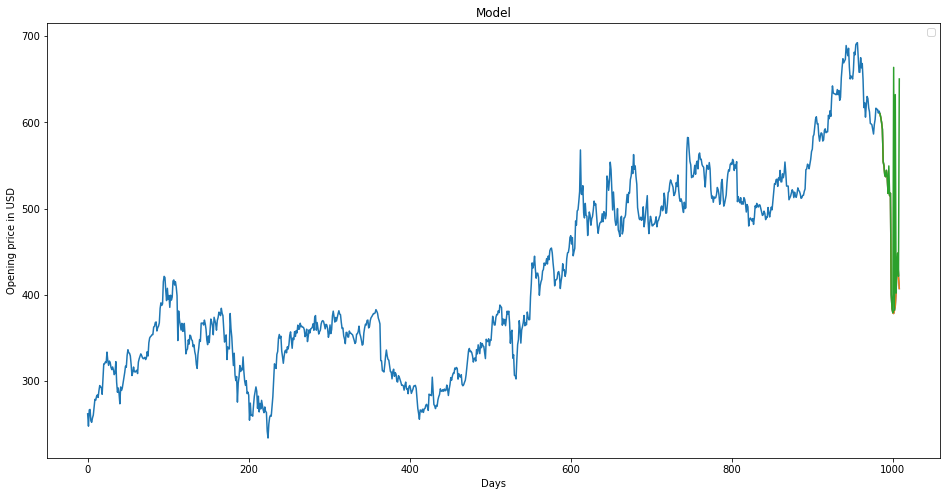

In [ ]:
predictions = tree_prediction
valid = df_[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Opening price in USD')
plt.plot(df_['Open'])
plt.plot(valid[['Open','Predictions']])
plt.legend('Val','Pred')
plt.show()

**Conclusion**

We have used Linear Regression to analyse the basic trend of Netflix stocks.

1. We have used 25 days forr future prediction of the opening price using decision tree model.
2. We found that the opening prices remains between 400 t 700 according to previous trends.
3. The use of linear regression is to study the trend pattern for opening prices for year 2018 - 2022.

